In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from f110_gym.envs.base_classes import Integrator
from collections import Counter,defaultdict
import random
import os
import pickle
import pandas as pd
from collections import defaultdict,deque
import math
import cmath
import scipy.stats as stats
import time
from sklearn.preprocessing import StandardScaler
from scipy.stats import truncnorm,wasserstein_distance
from sklearn.preprocessing import normalize

In [2]:
def get_statistical_properties(lidar_input,n_sectors=30):
        lidar_input = np.asarray(lidar_input, dtype=np.float32)
        sector_size = lidar_input.shape[0] // n_sectors
        sectors = lidar_input[:sector_size * n_sectors].reshape(n_sectors, sector_size)
        medians = np.median(sectors, axis=1)

        return normalize(medians.reshape(1, -1),axis=1)

In [3]:
def generate_binary_projection_matrix(n_features, n_sectors, prob_0, prob_1):
    if prob_0 + prob_1 != 1:
        raise ValueError("The sum of prob_0 and prob_1 must be 1")
    
    #Generate a random matrix with values 0 and 1 based on the given probabilities
    np.random.seed(42)
    matrix = np.random.choice([0, 1], size=(n_sectors, n_features), p=[prob_0, prob_1])
    #matrix = np.random.normal(loc=0.0, scale=1.0, size=(rows, cols))
    return matrix

In [4]:
def get_hamming_distance(x,y):
    return np.count_nonzero(x != y)

In [5]:
def get_wasserstein_distance(x,y):
    # The lower the diatance the more similar the two distributions are
    return wasserstein_distance(x,y)

In [3]:
def get_binary_representation(project):
    mi,ma = np.min(project),np.max(project)
    threshold = (ma+mi)/2
    return np.where(project > threshold, 1, 0)

In [7]:
path = './LiDAR_scans/'
files = os.listdir(path)

In [8]:
processed_files = files[:30]

n_features = 11 ; prob_0 =0.8 and prob_1 = 0.2
n_features = 10 ; prob_0 =0.85 and prob_1 = 0.15

In [ ]:
n_sectors = 30
n_features = 10
# projection_matrix = generate_binary_projection_matrix(n_features, n_sectors, 0.8, 0.2)
projection_matrix = np.load(f'/home/praneeth/shared_f1_tenth /Projection_matrices/projection_{n_features}f_s42.npy')
for f1 in processed_files:
    for f2 in processed_files:
        if f1 != f2:
            print(f'Comparing {f1} and {f2}')
            lidar1 = np.load(path + f1)
            lidar2 = np.load(path + f2)
            # print(f'Distance is :{get_wasserstein_distance(lidar1,lidar2)}',end =' ')
            stat1 = get_statistical_properties(lidar1)
            stat2 = get_statistical_properties(lidar2)
            proj1 = normalize(np.dot(stat1, projection_matrix))
            proj2 = normalize(np.dot(stat2, projection_matrix))
            bin1 = get_binary_representation(proj1)
            bin2 = get_binary_representation(proj2)
            # print(f'Min:{np.min(proj1)} Max:{np.max(proj1)}',end=' ')
            # print(f'Min:{np.min(proj2)} Max:{np.max(proj2)}',end=' ')
            # print(f'Hamming distance is :{get_hamming_distance(bin1,bin2)}')
            # print(f'Projection 1: {proj1}')
            # print(f'Projection 2: {proj2}')
            print(f'Binary of red {f1} is {bin1} ')
            print(f'Binary of blue {f2} is {bin2}')
            plt.plot(lidar1,color='r')
            plt.plot(lidar2,color='b')
            plt.show()
            print('-----------------------------------'*3)


In [ ]:
lidar_scan = np.load('/home/praneeth/shared_f1_tenth /LiDAR_scans/scan_1002.npy')
plt.plot(lidar_scan,label='Original')

In [ ]:
combined,means,stds,medians=get_statistical_properties(lidar_scan,n_sectors=30)

In [ ]:
labels = ['mean','std','median']
array = [means[0],stds[0],medians[0]]
for i in range(len(labels)):
    plt.plot(array[i],label=labels[i])
plt.legend()
plt.show()

In [220]:
def generate_random_binary_matrix(rows, cols, prob_0, prob_1):
    if prob_0 + prob_1 != 1:
        raise ValueError("The sum of prob_0 and prob_1 must be 1")
    
    # Generate a random matrix with values 0 and 1 based on the given probabilities
    matrix = np.random.choice([0, 1], size=(rows, cols), p=[prob_0, prob_1])
    return matrix

In [ ]:
mat = generate_random_binary_matrix(30, 11, 0.5, 0.5)
mat

real_vector = np.random.uniform(0,100,30).reshape(1,-1)
real_vector

In [222]:
real_vector = np.array([[0.4,0.34,0.24,0.66,0.78,0.92,1.08,2.14,3.45,4.22,5.33,6.44,7.55,8.66,9.77,10.88,11.1,11.1,12.21,11.32,16.43,15.54,12.65,11.76,10.87,11.98,3.09,4.20,2.31,2.42]]).reshape(1,-1)
different = np.array([[0.02,0.01,0.0002,0.06,0.1,0.2,0.34,1.09,3.098,4.90,3.09,2.32,5.12,4.12,3.12,2.12,1,2.34,7.89,6.78,5.67,4.56,3.45,2.34,1.23,0.12,2.23,0.34,1.45,1.56]]).reshape(1,-1)
different_2 = np.array([[0.4,0.34,0.24,0.66,0.78,0.92,1.08,2.14,3.45,4.22,5.33,6.44,7.55,8.66,9.77,10.88,11.1,11.1,1.21,1.32,6.43,5.54,10.65,1.76,0.87,1.98,0.09,0.20,0.31,0.42]]).reshape(1,-1)

In [ ]:
similar = real_vector + np.random.uniform(0,1,30).reshape(1,-1)
similar

different = np.array([[15.5737333 , 30.35287479, 4.35666582, 1.55008356, 34.97115348,
        8.35248588, 6.47629584, 40.26846655, 72.08910827,  48.27464627,
         71.46894525, 51.05495565, 76.39290961, 70.94184204, 56.57722877,
        52.02984116, 56.29249256, 66.29953727, 81.46202664, 23.78367042,
        41.60678735, 46.36669222, 67.05477026, 9.99769964, 1.66481419,
        2.93250483, 8.68290616, 6.11552738, 12.48695803,  20.09118602]])

In [ ]:
projection = normalize(np.dot(real_vector, mat))
projection_similar = normalize(np.dot(similar, mat))
projection_different = normalize(np.dot(different, mat))
projection_different_2 = normalize(np.dot(different_2, mat))
projection, projection_similar,projection_different,projection_different_2

In [225]:
def get_binary(project):
    mi,ma = np.min(project),np.max(project)
    threshold = (ma+mi)*0.5
    return np.where(project >= threshold, 1, 0)

In [ ]:
get_binary(projection),get_binary(projection_similar),get_binary(projection_different),get_binary(projection_different_2)

# Reward function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 180, 1000)

In [12]:
def get_y (x):
    # flags = x < 90
    func = lambda y : 2 * (np.exp(-0.018*y) - 0.5)
    return np.where(x <= 90, func(x),-1)
    # return  2 * (np.exp(-0.05*x) - 0.5)

In [ ]:
plt.plot(x, get_y(x))
plt.xlabel('Angle b/w track centers and current position')
plt.ylabel('Reward')
plt.title('Reward function')

# Plotting Centers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = '/home/praneeth/shared_f1_tenth /f1tenth_racetracks/Austin/Austin_centerline.csv'


In [3]:
map_centers_file = pd.read_csv(path)
map_centers_file.columns = ['x', 'y', 'w_r', 'w_l']
map_centers_file.index = map_centers_file.index.astype(int)
map_centers = map_centers_file.values[:, :2]

In [6]:
direction_vectors = np.vstack([np.asarray([0,0]),np.diff(map_centers,axis=0)])

In [ ]:
for i in range(direction_vectors.shape[0]):
    print(direction_vectors[i,:])

In [ ]:
np.vstack([np.array([0,0]),direction_vectors])

In [ ]:
map_centers.shape,map_centers

In [ ]:
direction_vectors.shape,direction_vectors

In [ ]:
map_centers.shape

In [ ]:
plt.arrow(0,0,0.5,0.1)

In [ ]:
plt.plot(map_centers[:, 0], map_centers[:, 1],'b')
plt.plot(direction_vectors[:, 0], direction_vectors[:, 1],'r')

In [ ]:
plt.plot(direction_vectors[0], direction_vectors[1])

In [ ]:
np.sum (np.linalg.norm(map_centers[:-1,:]- map_centers[1:,:],axis=1))

# Reward Modification

In [ ]:
class Reward:
    def __init__(self, min_speed=0.5, max_speed=1.8, map_centers=None,track_width = 2.2):
        self.min_speed = min_speed
        self.max_speed = max_speed
        self.map_centers = map_centers

        # Initial point and center that detrmines the position at the start of episode
        self.initial_point = np.array([[0, 0]])
        self.initial_center_idx , _ = self.__calculate_distance_from_center(self.map_centers,self.initial_point)
        self.initial_center = self.map_centers[self.initial_center_idx]

        # Race Track parameters
        self.distance_between_centers = np.hstack([[0.],np.linalg.norm(self.map_centers[:-1,:]- self.map_centers[1:,:],axis=1)])
        self.total_track_length = np.sum(self.distance_between_centers)
        self.track_width = track_width

        # Hyperparameters
        self.epsilon = 1e-5
        self.distance_travelled = 0

        # Centering reward function
        self.func = lambda y : 2 * (np.exp(-0.017*y) - 0.5)
    
    def __calculate_distance_from_center(self, centers,curr):
        distances = np.linalg.norm(centers - curr, axis=1)
        idx = np.argmin(distances)
        return idx, distances[idx]

    def reset(self, point):
        self.distance_travelled = 0
        self.initial_point = point
        idx , _ = self.__calculate_distance_from_center(self.map_centers,self.initial_point)
        self.initial_center = self.map_centers[idx]

    def exponential_angle(self, angle):
        if angle <=90:
            return self.func(angle)
        return -1

    def progress_reward(self, curr_position, next_position):
        distance = np.linalg.norm(curr_position - next_position)
        self.distance_travelled += distance
        return self.distance_travelled / self.total_track_length


    def centering_reward(self, curr_position,next_position):
        # print(f'Curr position: {curr_position}, Next position: {next_position} with initial center idx: {self.initial_center_idx}')
        position_vector = next_position - curr_position

        curr_idx, c = self.__calculate_distance_from_center(self.map_centers,curr_position)

        # print(f'Indices: {indices}')
        # print(np.vstack([self.map_centers[indices[0],:],self.map_centers[indices[1],:]]))

        if curr_idx == self.map_centers.shape[0] - 1:
            indices = [curr_idx-1,0]
        elif curr_idx == 0:
            indices = [self.map_centers.shape[0]-1,curr_idx+1]
        else:
            indices = [curr_idx-1, curr_idx+1]

        next_idx, n = self.__calculate_distance_from_center(np.vstack([self.map_centers[indices[0],:],self.map_centers[indices[1],:]]),next_position)
        # print(f'Next index is {next_idx} and distance is {n}')

        next_center = self.map_centers[next_idx]

        if curr_idx == next_idx:
            return -1
        # print(f'Current center: {self.initial_center}, Next center: {next_center}')
        center_vector = next_center - self.initial_center

        angle_rad = np.arccos(np.dot(center_vector, position_vector) / (np.linalg.norm(center_vector) * np.linalg.norm(position_vector)))

        # print(f'Center vector: {center_vector} and Position vector: {position_vector}')

        return self.exponential_angle(np.degrees(angle_rad))
    
    def milestone_reward(self, next_position):
        idx, _ = self.__calculate_distance_from_center(self.map_centers,next_position)
        if idx!=self.initial_center_idx:
            if self.distance_travelled >= np.abs(self.distance_between_centers[idx] - self.distance_between_centers[self.initial_center_idx]) :
                self.initial_center_idx = idx
                self.initial_center = self.map_centers[idx]
                return 5
            else:
                return 5 * self.distance_travelled / np.abs(self.distance_between_centers[idx] - self.distance_between_centers[self.initial_center_idx])
        return 0

    def calculate_reward(self, curr_position, next_position):
        progress_reward = self.progress_reward(curr_position, next_position)
        centering_reward = self.centering_reward(curr_position, next_position)
        milestone_reward = self.milestone_reward(next_position)
        print(f"Distance reward: {progress_reward}, Centering reward: {centering_reward}, Milestone reward: {milestone_reward}")
        return progress_reward + centering_reward + 0.3 * milestone_reward

# ET and IS

In [4]:
path = '/home/praneeth/shared_f1_tenth /LiDAR_scans/scan_2019.npy'
lidar_scan = np.load(path)
projection_matrix = np.load('/home/praneeth/shared_f1_tenth /Projection_matrices/projection_11f_s42.npy')

In [9]:
stat1 = get_statistical_properties(lidar_scan)            
proj1 = normalize(np.dot(stat1, projection_matrix))            
bin1 = get_binary_representation(proj1)
interger_value = np.dot(bin1,2**np.arange(bin1.shape[1])[::-1])[0]

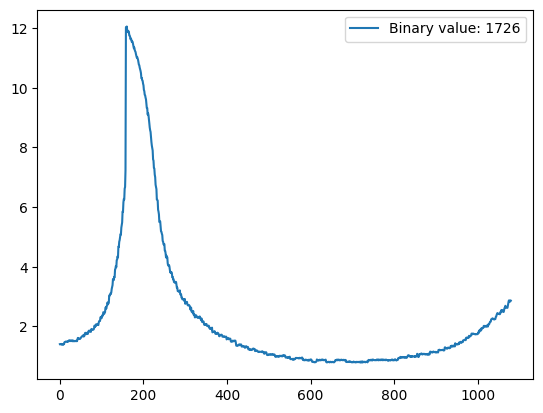

In [10]:
plt.plot(lidar_scan)
plt.legend([f'Binary value: {interger_value}'])

In [9]:
ET = np.zeros((1,6))
ET[:,[1,3,0]] = np.array([0.81,0.9,1])
ET

array([[1.  , 0.81, 0.  , 0.9 , 0.  , 0.  ]])

In [11]:
non_zero_indices = np.argwhere(ET !=0)[:,-1]
non_zero_indices

array([0, 1, 3])

In [12]:
IS = np.zeros((1,4))
IS = np.array([[0.5,0.5,0.01,0.01]])
IS

array([[0.5 , 0.5 , 0.01, 0.01]])

In [13]:
product = ET.T@IS
product

array([[0.5   , 0.5   , 0.01  , 0.01  ],
       [0.405 , 0.405 , 0.0081, 0.0081],
       [0.    , 0.    , 0.    , 0.    ],
       [0.45  , 0.45  , 0.009 , 0.009 ],
       [0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    ]])

In [15]:
shaped_product = product.reshape((6,2,2))
shaped_product

array([[[0.5   , 0.5   ],
        [0.01  , 0.01  ]],

       [[0.405 , 0.405 ],
        [0.0081, 0.0081]],

       [[0.    , 0.    ],
        [0.    , 0.    ]],

       [[0.45  , 0.45  ],
        [0.009 , 0.009 ]],

       [[0.    , 0.    ],
        [0.    , 0.    ]],

       [[0.    , 0.    ],
        [0.    , 0.    ]]])

In [16]:
shaped_product[non_zero_indices]

array([[[0.5   , 0.5   ],
        [0.01  , 0.01  ]],

       [[0.405 , 0.405 ],
        [0.0081, 0.0081]],

       [[0.45  , 0.45  ],
        [0.009 , 0.009 ]]])